<a href="https://colab.research.google.com/github/atreyavedantam/Task1_Atreya/blob/main/Atreya_Coordinator_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coordinator Task 1**

Welcome to the first coordinator task bois!!

This time we have a task tailored specifically for you guys, not a house price prediction task, not a cat-dog classification task but something much more interesting!

## **IPL result prediction task!**

Yes, you are right. Predict the *scripted* IPL matches using your ML skills! We have shared the IPL dataset spanning from the year 2008-2021. You are expected to predict the results for the year 2022. 

**Task** : Predict the winner of every match conducted in 2023 based on the dataset that we have shared. The coordinator(s) whose model predicts with highest accuracy will be given a treat.

**Instructions**


*   The coordinator task has two sub-parts: 
 
      1.   EDA (Exploratory Data Analysis)
      2. Data preprocessing
      3.   Model building and training 
 

*   The notebook is designed and categorized accordingly to help you throughout this task
*   For EDA you are expected to use Pandas, Numpy, Matplotlib, Seaborn wherever neccessary. (you are free to use any other Python libraries as well)
*   For the model building, use only linear/logistic regression 
*   You are not allowed to use Pytorch. Build the model from scratch using Numpy


**Note**: We don't expect you to check the 2022 IPL results, be fair and submit your model predictions.

Be as creative as possible, guys; we have given you a raw dataset, as you will have much more scope in exploring the problem statement. Enjoy the task!

# Downloading the dataset

The dataset is a CSV file. First download it onto your local system and upload it on your colab notebook. Use Pandas to open the CSV file and study the dataset.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import math as m

In [ ]:
raw_df = pd.read_csv('/content/IPL_train_ dataset.csv') #the path of the csv file may be different for you change it accordingly

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Analysis

Analyze the raw_df. Use Pandas to make observations. Feel free to use Google or Chatgpt for the same. So many functions can be performed using Pandas and remembering them isn't possible. So give the right prompt as you require and use those commands.

The next few cells are left for you guys to experiment

We have coded a few cells to give you an idea.

In [ ]:
raw_df.head(62)

,year,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
0,2021,Mumbai Indians,Royal Challengers Bangalore,159.0,160.0,Royal Challengers Bangalore,Field,RCB,2 wickets,Harshal Patel,MA Chidambaram Stadium,Chepauk
1,2021,Chennai Super Kings,Delhi Capitals,188.0,190.0,Delhi Capitals,Field,Capitals,7 wickets,Shikhar Dhawan,Wankhede Stadium,Mumbai
2,2021,Kolkata Knight Riders,Sunrisers Hyderabad,187.0,177.0,Sunrisers Hyderabad,Field,KKR,10 runs,Nitish Rana,MA Chidambaram Stadium,Chepauk
3,2021,Punjab Kings,Rajasthan Royals,221.0,217.0,Rajasthan Royals,Field,Punjab,4 runs,Sanju Samson,Wankhede Stadium,Mumbai
4,2021,Mumbai Indians,Kolkata Knight Riders,152.0,142.0,Kolkata Knight Riders,Field,Mumbai,10 runs,Rahul Chahar,MA Chidambaram Stadium,Chepauk
...,...,...,...,...,...,...,...,...,...,...,...,...
57,2021,Royal Challengers Bangalore,Kolkata Knight Riders,138.0,139.0,Royal Challengers Bangalore,Bat,KKR,4 wickets,Sunil Narine,Sharjah Cricket Stadium,NaN
58,2021,Delhi Capitals,Kolkata Knight Riders,135.0,136.0,Kolkata Knight Riders,Field,KKR,3 wickets,Venkatesh Iyer,Sharjah Cricket Stadium,NaN
59,2021,Chennai Super Kings,Kolkata Knight Riders,192.0,165.0,Kolkata Knight Riders,Field,Super,27 runs,Faf du Plessis,Dubai International Cricket Stadium,NaN
60,2020,Mumbai Indians,Chennai Super Kings,162.0,166.0,Chennai Super Kings,Field,Super,5 wickets,Ambati Rayudu,Zayed Cricket Stadium,Abu Dhabi


In [ ]:
raw_df.loc[60]

year                                 2020
team1                      Mumbai Indians
team2                 Chennai Super Kings
team1_score                         162.0
team2_score                         166.0
toss_winner           Chennai Super Kings
toss_choice                         Field
winner                              Super
margin                          5 wickets
man_of_the_match            Ambati Rayudu
stadium             Zayed Cricket Stadium
place                           Abu Dhabi
Name: 60, dtype: object

Notice that in the winners column, the team names aren't appropriately mentioned. Lets change them as follows:
replace 

*   RCB with Royal Challengers Bangalore
*   Capitals with Delhi Capitals
*   KKR with Kolkata Knight Riders
*   Punjab with Punjab Kings
*   Mumbai with Mumbai Indians
*   Royals with Rajasthan Royals
*   Super with Chennai Super Kings
*   Sunrisers with Sunrisers Hyderabad
*   Kings with Kings XI Punjab
*   Daredevils with Delhi Daredevils
*   Supergiant with Rising Pune Supergiants
*   Guj with Gujarat Lions
*   Supergiants with Rising Pune Supergiants
*   Warriors with Pune Warriors
*   Chargers with Deccan Chargers
*   Kochi with Kochi Tuskers Kerala












In [ ]:
raw_df.replace(to_replace="RCB", value="Royal Challengers Bangalore",inplace=True)
raw_df.replace(to_replace="Capitals", value="Delhi Capitals",inplace=True)
raw_df.replace(to_replace="KKR", value="Kolkata Knight Riders",inplace=True)
raw_df.replace(to_replace="Punjab", value="Punjab Kings",inplace=True)
raw_df.replace(to_replace="Mumbai", value="Mumbai Indians",inplace=True)
raw_df.replace(to_replace="Royals", value="Rajasthan Royals",inplace=True)
raw_df.replace(to_replace="Super", value="Chennai Super Kings",inplace=True)
raw_df.replace(to_replace="Sunrisers", value="Sunrisers Hyderabad",inplace=True)
raw_df.replace(to_replace="Kings", value="Kings XI Punjab",inplace=True)
raw_df.replace(to_replace="Daredevils", value="Delhi Daredevils",inplace=True)
raw_df.replace(to_replace=["Supergiant","Supergiants"], value="Rising Pune Supergiants",inplace=True)
raw_df.replace(to_replace="Guj", value="Gujarat Lions",inplace=True)
raw_df.replace(to_replace="Warriors", value="Pune Warriors",inplace=True)
raw_df.replace(to_replace="Chargers", value="Deccan Chargers",inplace=True)
raw_df.replace(to_replace="Kochi", value="Kochi Tuskers Kerala",inplace=True)

raw_df.place.replace(to_replace="Punjab Kings", value="Punjab",inplace=True)
raw_df.place.replace(to_replace="Mumbai Indians", value="Mumbai",inplace=True)
raw_df.place.replace(to_replace="Kochi Tuskers Kerala", value="Kochi",inplace=True)

raw_df.rename(columns={"year ": "year"}, inplace = True)


In [ ]:
raw_df.sample(10)

,year,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
695,2011,Chennai Super Kings,Kochi Tuskers Kerala,152.0,141.0,Chennai Super Kings,Bat,Chennai Super Kings,11 runs,Wriddhiman Saha,MA Chidambaram Stadium,Chepauk
95,2020,Mumbai Indians,Kings XI Punjab,176.0,176.0,Mumbai Indians,Bat,Tied,Tied,KL Rahul,Dubai International Cricket Stadium,NaN
333,2016,Gujarat Lions,Sunrisers Hyderabad,126.0,129.0,Sunrisers Hyderabad,Field,Sunrisers Hyderabad,5 wickets,Bhuvneshwar Kumar,Rajiv Gandhi International Stadium,Uppal
157,2019,Kolkata Knight Riders,Sunrisers Hyderabad,159.0,161.0,Sunrisers Hyderabad,Field,Sunrisers Hyderabad,9 wickets,Khaleel Ahmed,Rajiv Gandhi International Stadium,Uppal
580,2012,Kings XI Punjab,Royal Challengers Bangalore,163.0,166.0,Royal Challengers Bangalore,Field,Royal Challengers Bangalore,5 wickets,Chris Gayle,Punjab Cricket Association Stadium,Mohali
658,2011,Mumbai Indians,Deccan Chargers,172.0,135.0,Deccan Chargers,Field,Mumbai Indians,37 runs,Lasith Malinga,Rajiv Gandhi International Stadium,Uppal
652,2011,Pune Warriors,Mumbai Indians,118.0,124.0,Pune Warriors,Bat,Mumbai Indians,7 wickets,Munaf Patel,Wankhede Stadium,Mumbai
107,2020,Royal Challengers Bangalore,Mumbai Indians,164.0,166.0,Mumbai Indians,Field,Mumbai Indians,5 wickets,Suryakumar Yadav,Zayed Cricket Stadium,Abu Dhabi
400,2015,Sunrisers Hyderabad,Rajasthan Royals,201.0,194.0,Rajasthan Royals,Field,Sunrisers Hyderabad,7 runs,Eoin Morgan,Brabourne Stadium,Mumbai
301,2016,Delhi Daredevils,Kolkata Knight Riders,98.0,99.0,Kolkata Knight Riders,Field,Kolkata Knight Riders,9 wickets,Andre Russell,Eden Gardens,Kolkata


You can also discard the matches which were tied/abandoned

In [ ]:
raw_df.drop(raw_df.index[(raw_df["winner"]=="No")], axis=0, inplace= True)
raw_df.drop(raw_df.index[(raw_df["margin"]=="Tied")], axis=0, inplace= True)


In [ ]:
raw_df.place.unique()

array(['Chepauk', 'Mumbai', 'Ahmedabad', 'Delhi', nan, 'Abu Dhabi',
       'Kolkata', 'Jaipur', 'Bangalore', 'Uppal', 'Mohali',
       'Visakhapatnam', 'Bengaluru', 'Pune', 'Indore', 'Rajkot', 'Kanpur',
       'Raipur', 'Motera', 'Ranchi', 'Cuttack', 'Dharamsala', 'Kochi',
       'Jamtha', 'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein'],
      dtype=object)

In [ ]:
raw_df.loc[3, "year"]

2021

In [ ]:
raw_df.stadium.unique()

array(['MA Chidambaram Stadium', 'Wankhede Stadium',
       'Narendra Modi Stadium', 'Arun Jaitley Stadium',
       'Dubai International Cricket Stadium', 'Zayed Cricket Stadium',
       'Sharjah Cricket Stadium', 'Sheikh Zayed Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium', 'Feroz Shah Kotla',
       'M Chinnaswamy Stadium', 'Rajiv Gandhi International Stadium',
       'Punjab Cricket Association IS Bindra Stadium',
       'Andhra Cricket Association-Visakhapatnam District Cricket Association Stadium',
       'Maharashtra Cricket Association Stadium',
       'Holkar Cricket Stadium', 'Saurashtra Cricket Association Stadium',
       nan, 'Green Park',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'Sardar Patel Stadium', 'Punjab Cricket Association Stadium',
       'Brabourne Stadium', 'JSCA International Stadium Complex',
       'Barabati Stadium', 'Subrata Roy Sahara Stadium',
       'Himachal

#Data Visualization

Use Matplotlib and Seaborn to plot graphs to visualize the dataset. Plot pie charts, histograms, and scatterplots to analyze and present the data understandably.

Take help of this notebook to proceed ahead
https://www.kaggle.com/code/razamh/eda-ipl-dataset

Using the plots answer the following questions:


1.   Number of matches won by each team
2.   Percentage of matches in which first batting and second batting team has won
3.   Number of man of the matches won per player (plot for first 10 players)
4.   Number of matches conducted in each year 
5.   Number of matches in each venue
6.   Number of champions won per team (hint: the last match of every season is the final)
7. Average score of the first batting team in each venue


  We have helped you with the first question, answer the remaining the questions. 





In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
raw_df.winner.unique()

array(['Royal Challengers Bangalore', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Mumbai Indians',
       'Rajasthan Royals', 'Chennai Super Kings', 'Sunrisers Hyderabad',
       'Kings XI Punjab', 'Delhi Daredevils', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Match', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

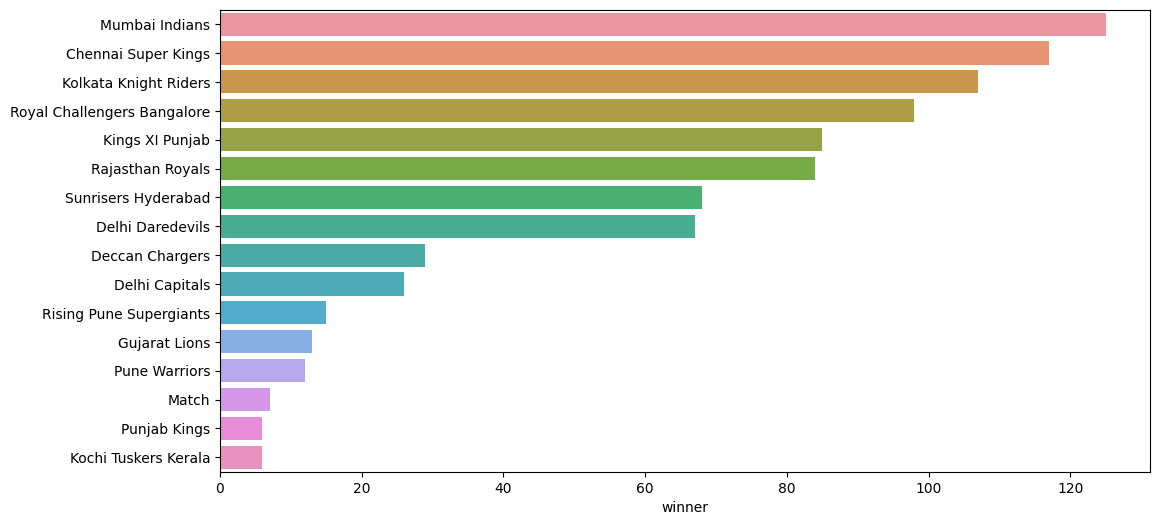

Mumbai Indians                 125
Chennai Super Kings            117
Kolkata Knight Riders          107
Royal Challengers Bangalore     98
Kings XI Punjab                 85
Rajasthan Royals                84
Sunrisers Hyderabad             68
Delhi Daredevils                67
Deccan Chargers                 29
Delhi Capitals                  26
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Match                            7
Punjab Kings                     6
Kochi Tuskers Kerala             6
Name: winner, dtype: int64


In [ ]:
plt.figure(figsize=(12,6))
data = raw_df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()
print(data)

Check the above plot, It also has Tied, Match, No on the Y-axis which have to be removed. Plot the above graph again making the changes.

Also clean the data similarly wherever required.

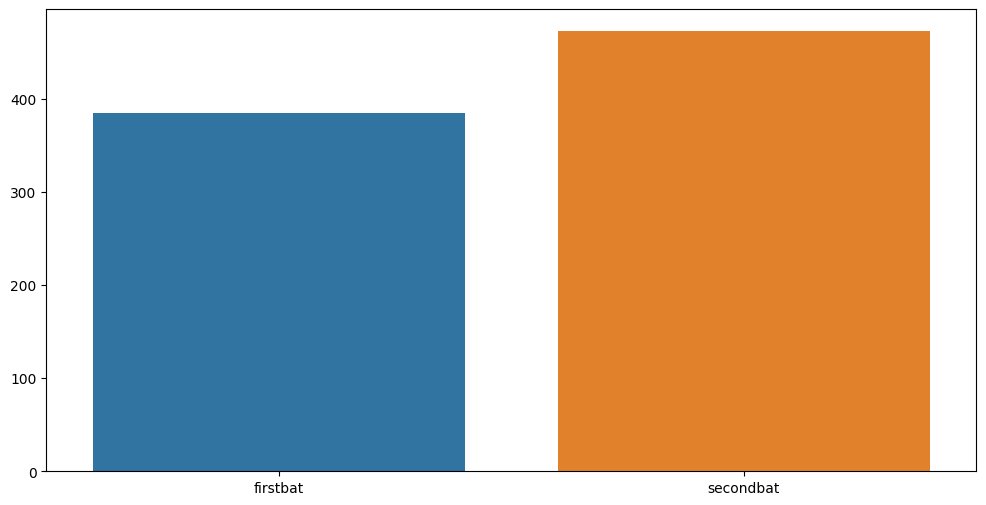

385 473


In [ ]:
plt.figure(figsize=(12, 6))
bat = ["firstbat", "secondbat"]
firstbatwin = []
for i in raw_df.index:
  if raw_df.loc[i, "toss_choice"] == "Bat" and raw_df.loc[i, "winner"] == raw_df.loc[i, "toss_winner"]:
      firstbatwin.append(raw_df.loc[i, "winner"])
  elif raw_df.loc[i, "toss_choice"] == "Field" and raw_df.loc[i, "winner"] != raw_df.loc[i, "toss_winner"]:
      firstbatwin.append(raw_df.loc[i, "winner"])

secondbatwin = []
for i in raw_df.index:
  if raw_df.loc[i, "toss_choice"] == "Bat" and raw_df.loc[i, "winner"] != raw_df.loc[i, "toss_winner"]:
      secondbatwin.append(raw_df.loc[i, "winner"])
  elif raw_df.loc[i, "toss_choice"] == "Field" and raw_df.loc[i, "winner"] == raw_df.loc[i, "toss_winner"]:
      secondbatwin.append(raw_df.loc[i, "winner"])

sns.barplot(x=bat, y=[len(firstbatwin), len(secondbatwin)])
plt.show()

print(len(firstbatwin), len(secondbatwin))

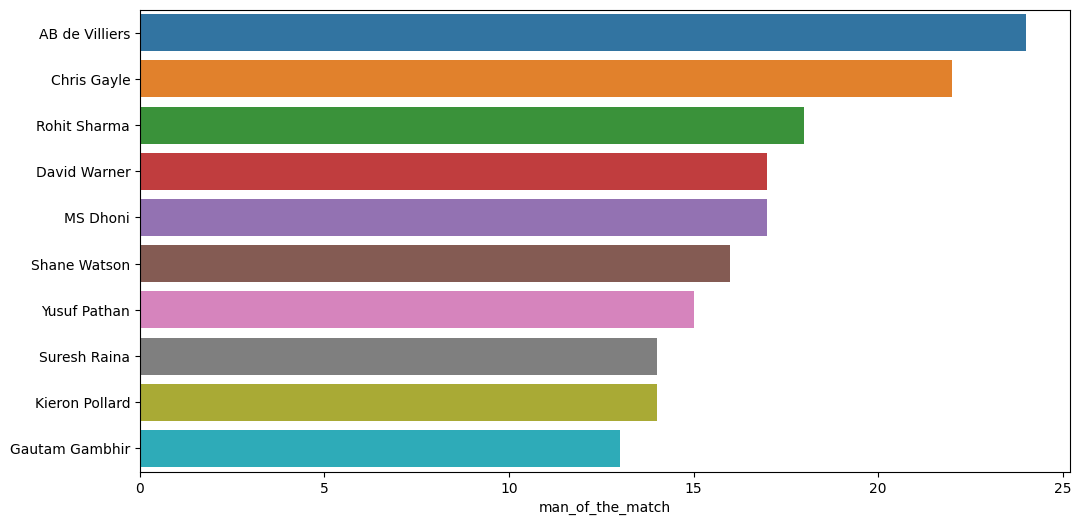

AB de Villiers    24
Chris Gayle       22
Rohit Sharma      18
David Warner      17
MS Dhoni          17
Shane Watson      16
Yusuf Pathan      15
Suresh Raina      14
Kieron Pollard    14
Gautam Gambhir    13
Name: man_of_the_match, dtype: int64


In [ ]:
plt.figure(figsize=(12, 6))
men_of_match = raw_df.man_of_the_match.value_counts()
men_of_match = men_of_match[0:10]
sns.barplot(y = men_of_match.index, x = men_of_match, orient='h')
plt.show()
print(men_of_match)

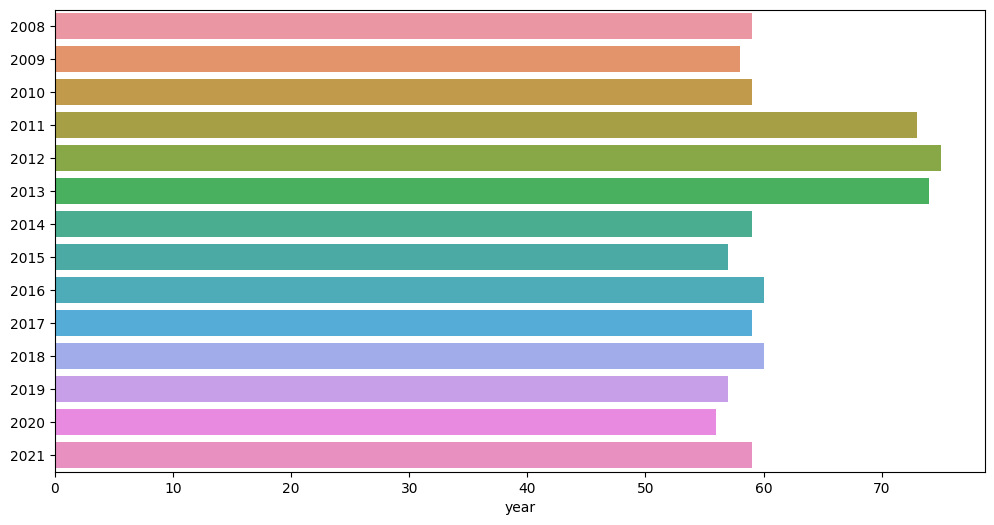

In [ ]:
plt.figure(figsize=(12,6))
match_in_year = raw_df.year.value_counts()
sns.barplot(y = match_in_year.index, x = match_in_year, orient='h')
plt.show()


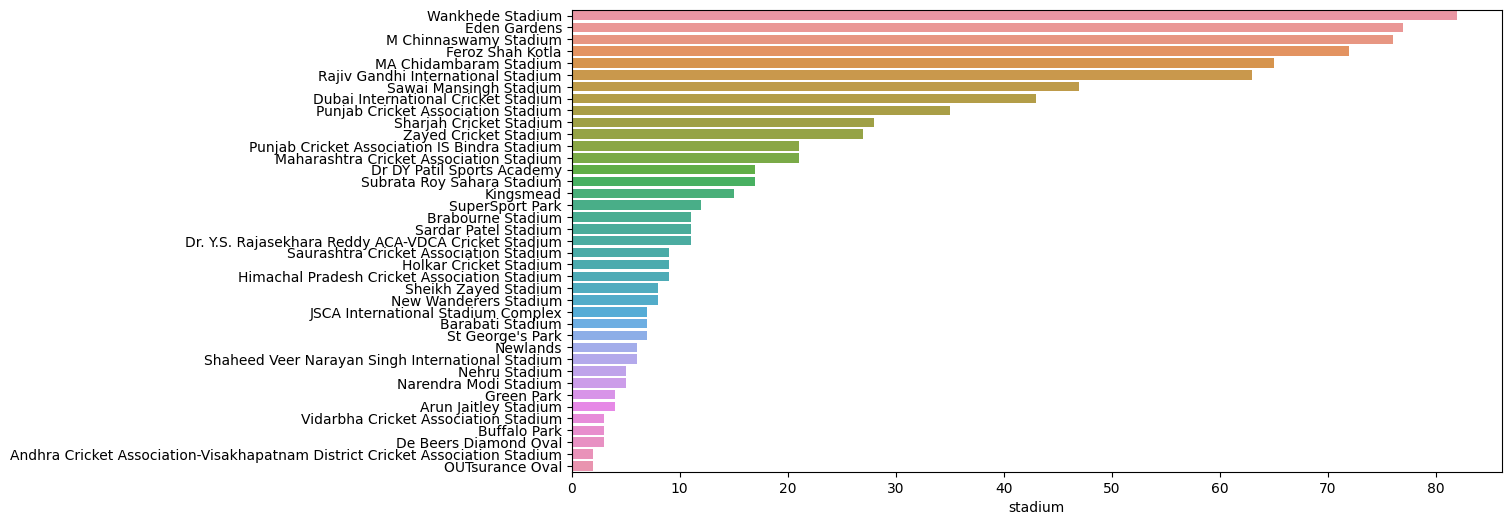

Wankhede Stadium                                                                 82
Eden Gardens                                                                     77
M Chinnaswamy Stadium                                                            76
Feroz Shah Kotla                                                                 72
MA Chidambaram Stadium                                                           65
Rajiv Gandhi International Stadium                                               63
Sawai Mansingh Stadium                                                           47
Dubai International Cricket Stadium                                              43
Punjab Cricket Association Stadium                                               35
Sharjah Cricket Stadium                                                          28
Zayed Cricket Stadium                                                            27
Punjab Cricket Association IS Bindra Stadium                                

In [ ]:
plt.figure(figsize=(12,6))
pl = raw_df.stadium.value_counts()
sns.barplot(y = pl.index, x = pl, orient='h')
plt.show()
print(pl)

['Chennai Super Kings', 'Mumbai Indians', 'Mumbai Indians', 'Chennai Super Kings', 'Mumbai Indians', 'Sunrisers Hyderabad', 'Mumbai Indians', 'Kolkata Knight Riders', 'Mumbai Indians', 'Kolkata Knight Riders', 'Chennai Super Kings', 'Chennai Super Kings', 'Deccan Chargers']


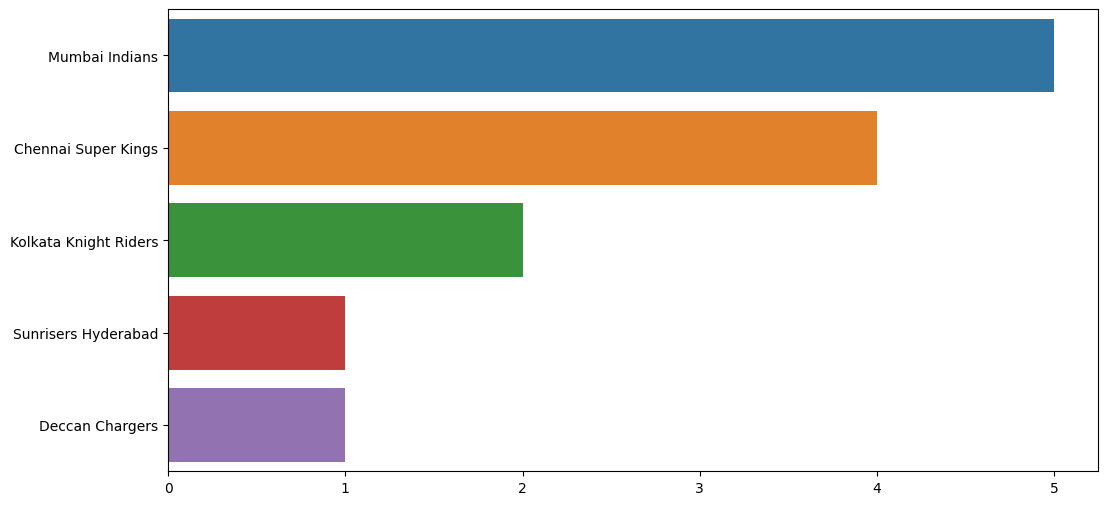

In [ ]:
year=2021
champions = []
for i in raw_df.index:
  if raw_df.loc[i, "year"] != year:
    champions.append(raw_df.loc[i-1, "winner"])
    year -= 1
print(champions)
champions = pd.Series(champions)
champ = champions.value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(y = champ.index, x = champ, orient = 'h')
plt.show()

In [ ]:
batting_avg = []
stadiums = ['MA Chidambaram Stadium', 'Wankhede Stadium',
       'Narendra Modi Stadium', 'Zayed Cricket Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Sheikh Zayed Stadium', 'M Chinnaswamy Stadium',
       'Rajiv Gandhi International Stadium', 'Sawai Mansingh Stadium',
       'Punjab Cricket Association IS Bindra Stadium', 'Eden Gardens',
       'Feroz Shah Kotla', 'Maharashtra Cricket Association Stadium',
       'Holkar Cricket Stadium', 'Saurashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'Sardar Patel Stadium', 'Punjab Cricket Association Stadium',
       'JSCA International Stadium Complex', 'Subrata Roy Sahara Stadium',
       'Nehru Stadium', 'Himachal Pradesh Cricket Association Stadium',
       'Brabourne Stadium', 'Vidarbha Cricket Association Stadium',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'New Wanderers Stadium', 'SuperSport Park']
#for i in range(len(stadiums)):
  #batting_avg.append(raw_df.query(' "stadium" == stadiums[i]').mean(axis = 'team1_score'))

In [ ]:
raw_df

,year,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
0,2021,Mumbai Indians,Royal Challengers Bangalore,159.0,160.0,Royal Challengers Bangalore,Field,Royal Challengers Bangalore,2 wickets,Harshal Patel,MA Chidambaram Stadium,Chepauk
1,2021,Chennai Super Kings,Delhi Capitals,188.0,190.0,Delhi Capitals,Field,Delhi Capitals,7 wickets,Shikhar Dhawan,Wankhede Stadium,Mumbai
2,2021,Kolkata Knight Riders,Sunrisers Hyderabad,187.0,177.0,Sunrisers Hyderabad,Field,Kolkata Knight Riders,10 runs,Nitish Rana,MA Chidambaram Stadium,Chepauk
3,2021,Punjab Kings,Rajasthan Royals,221.0,217.0,Rajasthan Royals,Field,Punjab Kings,4 runs,Sanju Samson,Wankhede Stadium,Mumbai
4,2021,Mumbai Indians,Kolkata Knight Riders,152.0,142.0,Kolkata Knight Riders,Field,Mumbai Indians,10 runs,Rahul Chahar,MA Chidambaram Stadium,Chepauk
...,...,...,...,...,...,...,...,...,...,...,...,...
879,2008,Royal Challengers Bangalore,Mumbai Indians,NaN,126.0,Mumbai Indians,Field,Mumbai Indians,9 wickets,Dilhara Fernando,M Chinnaswamy Stadium,Bangalore
880,2008,Kings XI Punjab,Rajasthan Royals,221.0,180.0,Rajasthan Royals,Field,Kings XI Punjab,41 runs,Shaun Marsh,Punjab Cricket Association Stadium,Mohali
881,2008,Rajasthan Royals,Delhi Daredevils,192.0,87.0,Delhi Daredevils,Field,Rajasthan Royals,105 runs,Shane Watson,Wankhede Stadium,Mumbai
882,2008,Kings XI Punjab,Chennai Super Kings,112.0,116.0,Kings XI Punjab,Bat,Chennai Super Kings,9 wickets,Makhaya Ntini,Wankhede Stadium,Mumbai


#Data Preprocessing

We have to clean the data and preprocess it to convert it into a trainable format.

For that you have to get rid of the NaN values, remove the un-neccesary parameters and also use feature engineering wherever required.

Data preprocessing is essential for the performance of the model, the better parameters you define/retain the better model can learn and hence perform.



We will help you with one team. Suppose lets take RCB. We have to predict the score of RCB using the parameters: team against which it is playing, did it win the toss, stadium, place.

In [ ]:
raw_df.team1.unique()

array(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Punjab Kings', 'Royal Challengers Bangalore', 'Delhi Capitals',
       'Rajasthan Royals', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Delhi Daredevils', 'Gujarat Lions', 'Rising Pune Supergiant',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [ ]:
RCB_df = raw_df.loc[((raw_df['team1'] == 'Royal Challengers Bangalore') | (raw_df['team2'] == 'Royal Challengers Bangalore'))]

In [ ]:
RCB_df

,year,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
0,2021,Mumbai Indians,Royal Challengers Bangalore,159.0,160.0,Royal Challengers Bangalore,Field,Royal Challengers Bangalore,2 wickets,Harshal Patel,MA Chidambaram Stadium,Chepauk
5,2021,Royal Challengers Bangalore,Sunrisers Hyderabad,149.0,143.0,Sunrisers Hyderabad,Field,Royal Challengers Bangalore,6 runs,Glenn Maxwell,MA Chidambaram Stadium,Chepauk
9,2021,Royal Challengers Bangalore,Kolkata Knight Riders,204.0,166.0,Royal Challengers Bangalore,Bat,Royal Challengers Bangalore,38 runs,AB de Villiers,MA Chidambaram Stadium,Chepauk
15,2021,Rajasthan Royals,Royal Challengers Bangalore,177.0,181.0,Royal Challengers Bangalore,Field,Royal Challengers Bangalore,10 wickets,Devdutt Padikkal,Wankhede Stadium,Mumbai
18,2021,Chennai Super Kings,Royal Challengers Bangalore,191.0,122.0,Chennai Super Kings,Bat,Chennai Super Kings,69 runs,Ravindra Jadeja,Wankhede Stadium,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
863,2008,Rajasthan Royals,Royal Challengers Bangalore,197.0,132.0,Royal Challengers Bangalore,Field,Rajasthan Royals,65 runs,Graeme Smith,Sawai Mansingh Stadium,Jaipur
867,2008,Royal Challengers Bangalore,Delhi Daredevils,154.0,158.0,Delhi Daredevils,Field,Delhi Daredevils,5 wickets,Shreevats Goswami,M Chinnaswamy Stadium,Bangalore
870,2008,Royal Challengers Bangalore,Chennai Super Kings,126.0,112.0,Royal Challengers Bangalore,Bat,Royal Challengers Bangalore,14 runs,Anil Kumble,MA Chidambaram Stadium,Chepauk
875,2008,Deccan Chargers,Royal Challengers Bangalore,165.0,171.0,Deccan Chargers,Bat,Royal Challengers Bangalore,5 wickets,Vinay Kumar,Rajiv Gandhi International Stadium,Uppal


In [ ]:
RCB_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)

<ipython-input-26-95c086e647ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCB_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)


In [ ]:
len(RCB_df['team1'].values)

206

In [ ]:
team_score = []
opp_team_score = []
for i in range(len(RCB_df)):
  if RCB_df['team1'].values[i] == 'Royal Challengers Bangalore':
    team_score.append(RCB_df['team1_score'].values[i])
    opp_team_score.append(RCB_df['team2_score'].values[i])
  else:
    team_score.append(RCB_df['team2_score'].values[i])
    opp_team_score.append(RCB_df['team1_score'].values[i])


Now we got the team score of RCB in all of its matches. This will be our target dataset.

In [ ]:
team_score

[160.0,
 149.0,
 204.0,
 181.0,
 122.0,
 171.0,
 145.0,
 92.0,
 156.0,
 165.0,
 153.0,
 164.0,
 137.0,
 166.0,
 138.0,
 163.0,
 109.0,
 158.0,
 137.0,
 169.0,
 194.0,
 171.0,
 179.0,
 85.0,
 145.0,
 164.0,
 120.0,
 152.0,
 131.0,
 70.0,
 181.0,
 113.0,
 158.0,
 205.0,
 149.0,
 174.0,
 171.0,
 213.0,
 161.0,
 202.0,
 171.0,
 178.0,
 176.0,
 159.0,
 198.0,
 167.0,
 176.0,
 205.0,
 175.0,
 167.0,
 127.0,
 141.0,
 187.0,
 92.0,
 218.0,
 134.0,
 172.0,
 157.0,
 148.0,
 142.0,
 134.0,
 213.0,
 49.0,
 nan,
 134.0,
 96.0,
 162.0,
 119.0,
 158.0,
 161.0,
 227.0,
 191.0,
 170.0,
 185.0,
 180.0,
 179.0,
 185.0,
 195.0,
 175.0,
 151.0,
 248.0,
 186.0,
 nan,
 139.0,
 159.0,
 200.0,
 179.0,
 166.0,
 191.0,
 154.0,
 134.0,
 99.0,
 115.0,
 124.0,
 226.0,
 235.0,
 84.0,
 83.0,
 180.0,
 139.0,
 146.0,
 116.0,
 148.0,
 70.0,
 124.0,
 158.0,
 168.0,
 166.0,
 190.0,
 186.0,
 142.0,
 160.0,
 165.0,
 154.0,
 156.0,
 162.0,
 158.0,
 165.0,
 123.0,
 263.0,
 136.0,
 171.0,
 187.0,
 190.0,
 183.0,
 115.0,
 174.0

In [ ]:
RCB_df.drop(columns =['team1_score','team2_score'], axis=1, inplace=True)

<ipython-input-30-fccbc704c500>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCB_df.drop(columns =['team1_score','team2_score'], axis=1, inplace=True)


In [ ]:
RCB_df

,year,team1,team2,toss_winner,toss_choice,stadium
0,2021,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,Field,MA Chidambaram Stadium
5,2021,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,Field,MA Chidambaram Stadium
9,2021,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Bat,MA Chidambaram Stadium
15,2021,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,Field,Wankhede Stadium
18,2021,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,Bat,Wankhede Stadium
...,...,...,...,...,...,...
863,2008,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,Field,Sawai Mansingh Stadium
867,2008,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils,Field,M Chinnaswamy Stadium
870,2008,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,Bat,MA Chidambaram Stadium
875,2008,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,Bat,Rajiv Gandhi International Stadium


Encoding the toss winner column. If RCB won the toss then 1 else 0

In [ ]:
for i in range(len(RCB_df)):
  if RCB_df['toss_winner'].values[i] == 'Royal Challengers Bangalore':
    RCB_df['toss_winner'].values[i] = 1
  else:
    RCB_df['toss_winner'].values[i] = 0

In [ ]:
RCB_df

,year,team1,team2,toss_winner,toss_choice,stadium
0,2021,Mumbai Indians,Royal Challengers Bangalore,1,Field,MA Chidambaram Stadium
5,2021,Royal Challengers Bangalore,Sunrisers Hyderabad,0,Field,MA Chidambaram Stadium
9,2021,Royal Challengers Bangalore,Kolkata Knight Riders,1,Bat,MA Chidambaram Stadium
15,2021,Rajasthan Royals,Royal Challengers Bangalore,1,Field,Wankhede Stadium
18,2021,Chennai Super Kings,Royal Challengers Bangalore,0,Bat,Wankhede Stadium
...,...,...,...,...,...,...
863,2008,Rajasthan Royals,Royal Challengers Bangalore,1,Field,Sawai Mansingh Stadium
867,2008,Royal Challengers Bangalore,Delhi Daredevils,0,Field,M Chinnaswamy Stadium
870,2008,Royal Challengers Bangalore,Chennai Super Kings,1,Bat,MA Chidambaram Stadium
875,2008,Deccan Chargers,Royal Challengers Bangalore,0,Bat,Rajiv Gandhi International Stadium


In [ ]:
opponent_team = []
for i in range(len(RCB_df)):
  if RCB_df['team1'].values[i] != 'Royal Challengers Bangalore':
    opponent_team.append(RCB_df['team1'].values[i])
  else:
    opponent_team.append(RCB_df['team2'].values[i])

In [ ]:
RCB_df['Opponent_Team'] = opponent_team

<ipython-input-35-04689642e00b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCB_df['Opponent_Team'] = opponent_team


In [ ]:
RCB_df.drop(columns =['team1','team2'], axis=1, inplace=True)

<ipython-input-36-853f4b1173dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCB_df.drop(columns =['team1','team2'], axis=1, inplace=True)


In [ ]:
RCB_df

,year,toss_winner,toss_choice,stadium,Opponent_Team
0,2021,1,Field,MA Chidambaram Stadium,Mumbai Indians
5,2021,0,Field,MA Chidambaram Stadium,Sunrisers Hyderabad
9,2021,1,Bat,MA Chidambaram Stadium,Kolkata Knight Riders
15,2021,1,Field,Wankhede Stadium,Rajasthan Royals
18,2021,0,Bat,Wankhede Stadium,Chennai Super Kings
...,...,...,...,...,...
863,2008,1,Field,Sawai Mansingh Stadium,Rajasthan Royals
867,2008,0,Field,M Chinnaswamy Stadium,Delhi Daredevils
870,2008,1,Bat,MA Chidambaram Stadium,Chennai Super Kings
875,2008,0,Bat,Rajiv Gandhi International Stadium,Deccan Chargers


In [ ]:
RCB_df['RCBscore'] = team_score

<ipython-input-38-055ff9a85e80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCB_df['RCBscore'] = team_score


In [ ]:
RCB_df


,year,toss_winner,toss_choice,stadium,Opponent_Team,RCBscore
0,2021,1,Field,MA Chidambaram Stadium,Mumbai Indians,160.0
5,2021,0,Field,MA Chidambaram Stadium,Sunrisers Hyderabad,149.0
9,2021,1,Bat,MA Chidambaram Stadium,Kolkata Knight Riders,204.0
15,2021,1,Field,Wankhede Stadium,Rajasthan Royals,181.0
18,2021,0,Bat,Wankhede Stadium,Chennai Super Kings,122.0
...,...,...,...,...,...,...
863,2008,1,Field,Sawai Mansingh Stadium,Rajasthan Royals,132.0
867,2008,0,Field,M Chinnaswamy Stadium,Delhi Daredevils,154.0
870,2008,1,Bat,MA Chidambaram Stadium,Chennai Super Kings,126.0
875,2008,0,Bat,Rajiv Gandhi International Stadium,Deccan Chargers,171.0


Similarly encode the other columns. Machine Learning models don't understand words/text so you have to encode the text to numbers.

Check different techniques of encoding: one-hot encoding and number encoding and use either one to encode the columns: toss_choice, opponent team and stadium

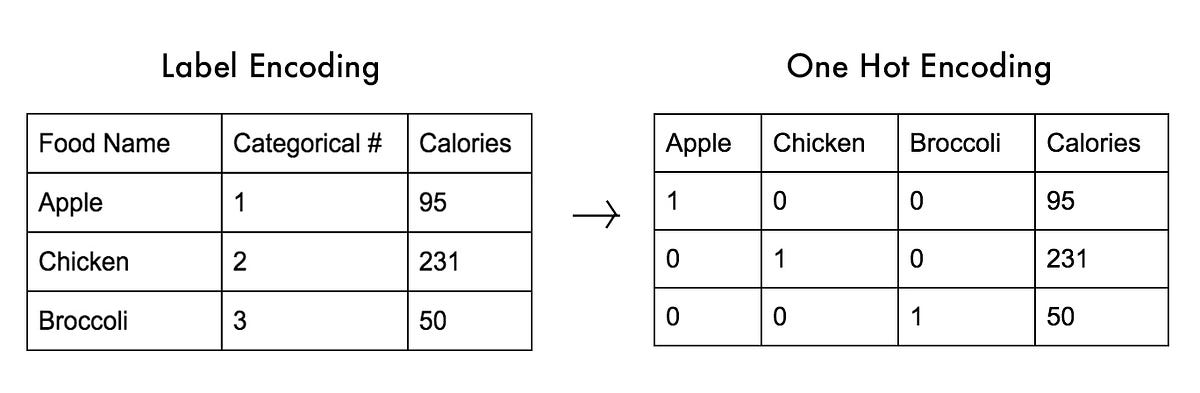

Now it's time for you to take up! All the best 

Prepare similar data frames for other teams. Predict the scores of the team based on the parameters.

Suppose say you have to predict who will win RCB vs CSK, predict the score of RCB considering CSK as opponent. Then predict score of CSK with RCB as opponent. Then compare both scores, whoever scores higher will be the winner of the match.




In [ ]:
field = []
bat = []

for i in RCB_df.index:
  if RCB_df.loc[i, "toss_choice"] == "Field":
    field.append(1)
    bat.append(0)
  else:
    field.append(0)
    bat.append(1)

RCB_df["Field"] = field
RCB_df["Bat"] = bat
RCB_df.drop(columns = ["toss_choice"], axis = 1, inplace = True)


<ipython-input-40-1beef0a0ff0d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCB_df["Field"] = field
<ipython-input-40-1beef0a0ff0d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCB_df["Bat"] = bat
<ipython-input-40-1beef0a0ff0d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCB_df.drop(columns = ["toss_choice

In [ ]:
stadia = []
stad = ['MA Chidambaram Stadium', 'Wankhede Stadium',
       'Narendra Modi Stadium', 'Zayed Cricket Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Sheikh Zayed Stadium', 'M Chinnaswamy Stadium',
       'Rajiv Gandhi International Stadium', 'Sawai Mansingh Stadium',
       'Punjab Cricket Association IS Bindra Stadium', 'Eden Gardens',
       'Feroz Shah Kotla', 'Maharashtra Cricket Association Stadium',
       'Holkar Cricket Stadium', 'Saurashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'Sardar Patel Stadium', 'Punjab Cricket Association Stadium',
       'JSCA International Stadium Complex', 'Subrata Roy Sahara Stadium',
       'Nehru Stadium', 'Himachal Pradesh Cricket Association Stadium',
       'Brabourne Stadium', 'Vidarbha Cricket Association Stadium',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'New Wanderers Stadium', 'SuperSport Park']

for i in RCB_df.index:
  temp = []
  for j in range(len(stad)):
    if RCB_df.loc[i, "stadium"] == stad[j]:
      temp.append(1)
    else:
      temp.append(0)
  stadia.append(temp)
stadia = np.array(stadia)
col = stadia.transpose()

for i in range(len(stad)):
  RCB_df[stad[i]] = col[i]

RCB_df.drop(columns = ["stadium"], axis = 1, inplace = True)

<ipython-input-41-9ae00bdfbf0f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCB_df[stad[i]] = col[i]
<ipython-input-41-9ae00bdfbf0f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCB_df[stad[i]] = col[i]
<ipython-input-41-9ae00bdfbf0f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [ ]:
one_hot_opponent = []
oppo = ['Mumbai Indians', 'Sunrisers Hyderabad', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Chennai Super Kings', 'Delhi Capitals',
       'Punjab Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Royal Challengers Bangalore']

for i in RCB_df.index:
  temp = []
  for j in range(len(oppo)):
    if RCB_df.loc[i, "Opponent_Team"] == oppo[j]:
      temp.append(1)
    else:
      temp.append(0)
  one_hot_opponent.append(temp)
one_hot_opponent = np.array(one_hot_opponent)
team = one_hot_opponent.transpose()

for i in range(len(oppo)):
  RCB_df[oppo[i]] = team[i]

RCB_df.drop(columns = ["Opponent_Team"], axis = 1, inplace = True)

<ipython-input-42-00c82ba71112>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCB_df[oppo[i]] = team[i]
<ipython-input-42-00c82ba71112>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCB_df[oppo[i]] = team[i]
<ipython-input-42-00c82ba71112>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [ ]:
RCB_df

,year,toss_winner,RCBscore,Field,Bat,MA Chidambaram Stadium,Wankhede Stadium,Narendra Modi Stadium,Zayed Cricket Stadium,Sharjah Cricket Stadium,...,Punjab Kings,Kings XI Punjab,Delhi Daredevils,Rising Pune Supergiant,Gujarat Lions,Rising Pune Supergiants,Pune Warriors,Deccan Chargers,Kochi Tuskers Kerala,Royal Challengers Bangalore
0,2021,1,160.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2021,0,149.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2021,1,204.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2021,1,181.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,2021,0,122.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,2008,1,132.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
867,2008,0,154.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
870,2008,1,126.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
875,2008,0,171.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#MUMBAI INDIANS
MI_df = raw_df.loc[((raw_df['team1'] == 'Mumbai Indians') | (raw_df['team2'] == 'Mumbai Indians'))]

In [ ]:
MI_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)
MI_df

<ipython-input-45-4ccc5b537f43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MI_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)


,year,team1,team2,team1_score,team2_score,toss_winner,toss_choice,stadium
0,2021,Mumbai Indians,Royal Challengers Bangalore,159.0,160.0,Royal Challengers Bangalore,Field,MA Chidambaram Stadium
4,2021,Mumbai Indians,Kolkata Knight Riders,152.0,142.0,Kolkata Knight Riders,Field,MA Chidambaram Stadium
8,2021,Mumbai Indians,Sunrisers Hyderabad,150.0,137.0,Mumbai Indians,Bat,MA Chidambaram Stadium
12,2021,Mumbai Indians,Delhi Capitals,137.0,138.0,Mumbai Indians,Bat,MA Chidambaram Stadium
16,2021,Mumbai Indians,Punjab Kings,131.0,132.0,Punjab Kings,Field,MA Chidambaram Stadium
...,...,...,...,...,...,...,...,...
866,2008,Mumbai Indians,Deccan Chargers,178.0,153.0,Deccan Chargers,Field,Rajiv Gandhi International Stadium
869,2008,Kings XI Punjab,Mumbai Indians,189.0,188.0,Mumbai Indians,Field,Wankhede Stadium
874,2008,Mumbai Indians,Delhi Daredevils,176.0,179.0,Delhi Daredevils,Field,Feroz Shah Kotla
877,2008,Mumbai Indians,Rajasthan Royals,145.0,146.0,Rajasthan Royals,Field,Sawai Mansingh Stadium


In [ ]:
team_score = []
for i in range(len(MI_df)):
  if MI_df['team1'].values[i] == 'Mumbai Indians':
    team_score.append(MI_df['team1_score'].values[i])
  else:
    team_score.append(MI_df['team2_score'].values[i])
MI_df.drop(columns =['team1_score','team2_score'], axis=1, inplace=True)
for i in range(len(MI_df)):
  if MI_df['toss_winner'].values[i] == 'Mumbai Indians':
    MI_df['toss_winner'].values[i] = 1
  else:
    MI_df['toss_winner'].values[i] = 0
    opponent_team = []
for i in range(len(MI_df)):
  if MI_df['team1'].values[i] != 'Mumbai Indians':
    opponent_team.append(MI_df['team1'].values[i])
  else:
    opponent_team.append(MI_df['team2'].values[i])
MI_df['Opponent_Team'] = opponent_team
MI_df.drop(columns =['team1','team2'], axis=1, inplace=True)
MI_df['MIscore'] = team_score
field = []
bat = []

for i in MI_df.index:
  if MI_df.loc[i, "toss_choice"] == "Field":
    field.append(1)
    bat.append(0)
  else:
    field.append(0)
    bat.append(1)

MI_df["Field"] = field
MI_df["Bat"] = bat
MI_df.drop(columns = ["toss_choice"], axis = 1, inplace = True)
stadia = []
stad = ['MA Chidambaram Stadium', 'Wankhede Stadium',
      'Narendra Modi Stadium', 'Zayed Cricket Stadium',
      'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
      'Sheikh Zayed Stadium', 'M Chinnaswamy Stadium',
      'Rajiv Gandhi International Stadium', 'Sawai Mansingh Stadium',
      'Punjab Cricket Association IS Bindra Stadium', 'Eden Gardens',
      'Feroz Shah Kotla', 'Maharashtra Cricket Association Stadium',
      'Holkar Cricket Stadium', 'Saurashtra Cricket Association Stadium',
      'Shaheed Veer Narayan Singh International Stadium',
      'Sardar Patel Stadium', 'Punjab Cricket Association Stadium',
      'JSCA International Stadium Complex', 'Subrata Roy Sahara Stadium',
      'Nehru Stadium', 'Himachal Pradesh Cricket Association Stadium',
      'Brabourne Stadium', 'Vidarbha Cricket Association Stadium',
      'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
      'Kingsmead', 'New Wanderers Stadium', 'SuperSport Park']

for i in MI_df.index:
  temp = []
  for j in range(len(stad)):
    if MI_df.loc[i, "stadium"] == stad[j]:
      temp.append(1)
    else:
      temp.append(0)
  stadia.append(temp)
stadia = np.array(stadia)
col = stadia.transpose()

for i in range(len(stad)):
  MI_df[stad[i]] = col[i]

MI_df.drop(columns = ["stadium"], axis = 1, inplace = True)
one_hot_opponent = []
oppo = ['Mumbai Indians', 'Sunrisers Hyderabad', 'Kolkata Knight Riders',
      'Rajasthan Royals', 'Chennai Super Kings', 'Delhi Capitals',
      'Punjab Kings', 'Kings XI Punjab', 'Delhi Daredevils',
      'Rising Pune Supergiant', 'Gujarat Lions',
      'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
      'Kochi Tuskers Kerala', 'Royal Challengers Bangalore']

for i in MI_df.index:
  temp = []
  for j in range(len(oppo)):
    if MI_df.loc[i, "Opponent_Team"] == oppo[j]:
      temp.append(1)
    else:
      temp.append(0)
  one_hot_opponent.append(temp)
one_hot_opponent = np.array(one_hot_opponent)
team = one_hot_opponent.transpose()

for i in range(len(oppo)):
  MI_df[oppo[i]] = team[i]

MI_df.drop(columns = ["Opponent_Team"], axis = 1, inplace = True)

<ipython-input-46-a4be03ad6f2f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MI_df.drop(columns =['team1_score','team2_score'], axis=1, inplace=True)
<ipython-input-46-a4be03ad6f2f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MI_df['Opponent_Team'] = opponent_team
<ipython-input-46-a4be03ad6f2f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MI_df.drop(columns =['tea

In [ ]:
#KOLKATA KNIGHT RIDERS

KKR_df = raw_df.loc[((raw_df['team1'] == 'Kolkata Knight Riders') | (raw_df['team2'] == 'Kolkata Knight Riders'))]
KKR_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)
team_score = []
for i in range(len(KKR_df)):
  if KKR_df['team1'].values[i] == 'Kolkata Knight Riders':
    team_score.append(KKR_df['team1_score'].values[i])
  else:
    team_score.append(KKR_df['team2_score'].values[i])
KKR_df.drop(columns =['team1_score','team2_score'], axis=1, inplace=True)
for i in range(len(KKR_df)):
  if KKR_df['toss_winner'].values[i] == 'Kolkata Knight Riders':
    KKR_df['toss_winner'].values[i] = 1
  else:
    KKR_df['toss_winner'].values[i] = 0
    opponent_team = []
for i in range(len(KKR_df)):
  if KKR_df['team1'].values[i] != 'Kolkata Knight Riders':
    opponent_team.append(KKR_df['team1'].values[i])
  else:
    opponent_team.append(KKR_df['team2'].values[i])
KKR_df['Opponent_Team'] = opponent_team
KKR_df.drop(columns =['team1','team2'], axis=1, inplace=True)
KKR_df['KKRscore'] = team_score
field = []
bat = []

for i in KKR_df.index:
  if KKR_df.loc[i, "toss_choice"] == "Field":
    field.append(1)
    bat.append(0)
  else:
    field.append(0)
    bat.append(1)

KKR_df["Field"] = field
KKR_df["Bat"] = bat
KKR_df.drop(columns = ["toss_choice"], axis = 1, inplace = True)
stadia = []
stad = ['MA Chidambaram Stadium', 'Wankhede Stadium',
      'Narendra Modi Stadium', 'Zayed Cricket Stadium',
      'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
      'Sheikh Zayed Stadium', 'M Chinnaswamy Stadium',
      'Rajiv Gandhi International Stadium', 'Sawai Mansingh Stadium',
      'Punjab Cricket Association IS Bindra Stadium', 'Eden Gardens',
      'Feroz Shah Kotla', 'Maharashtra Cricket Association Stadium',
      'Holkar Cricket Stadium', 'Saurashtra Cricket Association Stadium',
      'Shaheed Veer Narayan Singh International Stadium',
      'Sardar Patel Stadium', 'Punjab Cricket Association Stadium',
      'JSCA International Stadium Complex', 'Subrata Roy Sahara Stadium',
      'Nehru Stadium', 'Himachal Pradesh Cricket Association Stadium',
      'Brabourne Stadium', 'Vidarbha Cricket Association Stadium',
      'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
      'Kingsmead', 'New Wanderers Stadium', 'SuperSport Park']

for i in KKR_df.index:
  temp = []
  for j in range(len(stad)):
    if KKR_df.loc[i, "stadium"] == stad[j]:
      temp.append(1)
    else:
      temp.append(0)
  stadia.append(temp)
stadia = np.array(stadia)
col = stadia.transpose()

for i in range(len(stad)):
  KKR_df[stad[i]] = col[i]

KKR_df.drop(columns = ["stadium"], axis = 1, inplace = True)
one_hot_opponent = []
oppo = ['Mumbai Indians', 'Sunrisers Hyderabad', 'Kolkata Knight Riders',
      'Rajasthan Royals', 'Chennai Super Kings', 'Delhi Capitals',
      'Punjab Kings', 'Kings XI Punjab', 'Delhi Daredevils',
      'Rising Pune Supergiant', 'Gujarat Lions',
      'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
      'Kochi Tuskers Kerala', 'Royal Challengers Bangalore']

for i in KKR_df.index:
  temp = []
  for j in range(len(oppo)):
    if KKR_df.loc[i, "Opponent_Team"] == oppo[j]:
      temp.append(1)
    else:
      temp.append(0)
  one_hot_opponent.append(temp)
one_hot_opponent = np.array(one_hot_opponent)
team = one_hot_opponent.transpose()

for i in range(len(oppo)):
  KKR_df[oppo[i]] = team[i]

KKR_df.drop(columns = ["Opponent_Team"], axis = 1, inplace = True)

<ipython-input-47-e50e6c4e88a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KKR_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)
<ipython-input-47-e50e6c4e88a9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KKR_df.drop(columns =['team1_score','team2_score'], axis=1, inplace=True)
<ipython-input-47-e50e6c4e88a9>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [ ]:
#SUNRISERS HYDERABAD

SRH_df = raw_df.loc[((raw_df['team1'] == 'Sunrisers Hyderabad') | (raw_df['team2'] == 'Sunrisers Hyderabad'))]
SRH_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)
team_score = []
for i in range(len(SRH_df)):
  if SRH_df['team1'].values[i] == 'Sunrisers Hyderabad':
    team_score.append(SRH_df['team1_score'].values[i])
  else:
    team_score.append(SRH_df['team2_score'].values[i])
SRH_df.drop(columns =['team1_score','team2_score'], axis=1, inplace=True)
for i in range(len(SRH_df)):
  if SRH_df['toss_winner'].values[i] == 'Sunrisers Hyderabad':
    SRH_df['toss_winner'].values[i] = 1
  else:
    SRH_df['toss_winner'].values[i] = 0
    opponent_team = []
for i in range(len(SRH_df)):
  if SRH_df['team1'].values[i] != 'Sunrisers Hyderabad':
    opponent_team.append(SRH_df['team1'].values[i])
  else:
    opponent_team.append(SRH_df['team2'].values[i])
SRH_df['Opponent_Team'] = opponent_team
SRH_df.drop(columns =['team1','team2'], axis=1, inplace=True)
SRH_df['SRHscore'] = team_score
field = []
bat = []

for i in SRH_df.index:
  if SRH_df.loc[i, "toss_choice"] == "Field":
    field.append(1)
    bat.append(0)
  else:
    field.append(0)
    bat.append(1)

SRH_df["Field"] = field
SRH_df["Bat"] = bat
SRH_df.drop(columns = ["toss_choice"], axis = 1, inplace = True)
stadia = []
stad = ['MA Chidambaram Stadium', 'Wankhede Stadium',
      'Narendra Modi Stadium', 'Zayed Cricket Stadium',
      'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
      'Sheikh Zayed Stadium', 'M Chinnaswamy Stadium',
      'Rajiv Gandhi International Stadium', 'Sawai Mansingh Stadium',
      'Punjab Cricket Association IS Bindra Stadium', 'Eden Gardens',
      'Feroz Shah Kotla', 'Maharashtra Cricket Association Stadium',
      'Holkar Cricket Stadium', 'Saurashtra Cricket Association Stadium',
      'Shaheed Veer Narayan Singh International Stadium',
      'Sardar Patel Stadium', 'Punjab Cricket Association Stadium',
      'JSCA International Stadium Complex', 'Subrata Roy Sahara Stadium',
      'Nehru Stadium', 'Himachal Pradesh Cricket Association Stadium',
      'Brabourne Stadium', 'Vidarbha Cricket Association Stadium',
      'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
      'Kingsmead', 'New Wanderers Stadium', 'SuperSport Park']

for i in SRH_df.index:
  temp = []
  for j in range(len(stad)):
    if SRH_df.loc[i, "stadium"] == stad[j]:
      temp.append(1)
    else:
      temp.append(0)
  stadia.append(temp)
stadia = np.array(stadia)
col = stadia.transpose()

for i in range(len(stad)):
  SRH_df[stad[i]] = col[i]

SRH_df.drop(columns = ["stadium"], axis = 1, inplace = True)
one_hot_opponent = []
oppo = ['Mumbai Indians', 'Sunrisers Hyderabad', 'Kolkata Knight Riders',
      'Rajasthan Royals', 'Chennai Super Kings', 'Delhi Capitals',
      'Punjab Kings', 'Kings XI Punjab', 'Delhi Daredevils',
      'Rising Pune Supergiant', 'Gujarat Lions',
      'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
      'Kochi Tuskers Kerala', 'Royal Challengers Bangalore']

for i in SRH_df.index:
  temp = []
  for j in range(len(oppo)):
    if SRH_df.loc[i, "Opponent_Team"] == oppo[j]:
      temp.append(1)
    else:
      temp.append(0)
  one_hot_opponent.append(temp)
one_hot_opponent = np.array(one_hot_opponent)
team = one_hot_opponent.transpose()

for i in range(len(oppo)):
  SRH_df[oppo[i]] = team[i]

SRH_df.drop(columns = ["Opponent_Team"], axis = 1, inplace = True)

<ipython-input-48-078146dd5c4a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SRH_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)
<ipython-input-48-078146dd5c4a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SRH_df.drop(columns =['team1_score','team2_score'], axis=1, inplace=True)
<ipython-input-48-078146dd5c4a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [ ]:
#RAJASTHAN ROYALS

RR_df = raw_df.loc[((raw_df['team1'] == 'Rajasthan Royals') | (raw_df['team2'] == 'Rajasthan Royals'))]
RR_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)
team_score = []
for i in range(len(RR_df)):
  if RR_df['team1'].values[i] == 'Rajasthan Royals':
    team_score.append(RR_df['team1_score'].values[i])
  else:
    team_score.append(RR_df['team2_score'].values[i])
RR_df.drop(columns =['team1_score','team2_score'], axis=1, inplace=True)
for i in range(len(RR_df)):
  if RR_df['toss_winner'].values[i] == 'Rajasthan Royals':
    RR_df['toss_winner'].values[i] = 1
  else:
    RR_df['toss_winner'].values[i] = 0
    opponent_team = []
for i in range(len(RR_df)):
  if RR_df['team1'].values[i] != 'Rajasthan Royals':
    opponent_team.append(RR_df['team1'].values[i])
  else:
    opponent_team.append(RR_df['team2'].values[i])
RR_df['Opponent_Team'] = opponent_team
RR_df.drop(columns =['team1','team2'], axis=1, inplace=True)
RR_df['RRscore'] = team_score
field = []
bat = []

for i in RR_df.index:
  if RR_df.loc[i, "toss_choice"] == "Field":
    field.append(1)
    bat.append(0)
  else:
    field.append(0)
    bat.append(1)

RR_df["Field"] = field
RR_df["Bat"] = bat
RR_df.drop(columns = ["toss_choice"], axis = 1, inplace = True)
stadia = []
stad = ['MA Chidambaram Stadium', 'Wankhede Stadium',
      'Narendra Modi Stadium', 'Zayed Cricket Stadium',
      'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
      'Sheikh Zayed Stadium', 'M Chinnaswamy Stadium',
      'Rajiv Gandhi International Stadium', 'Sawai Mansingh Stadium',
      'Punjab Cricket Association IS Bindra Stadium', 'Eden Gardens',
      'Feroz Shah Kotla', 'Maharashtra Cricket Association Stadium',
      'Holkar Cricket Stadium', 'Saurashtra Cricket Association Stadium',
      'Shaheed Veer Narayan Singh International Stadium',
      'Sardar Patel Stadium', 'Punjab Cricket Association Stadium',
      'JSCA International Stadium Complex', 'Subrata Roy Sahara Stadium',
      'Nehru Stadium', 'Himachal Pradesh Cricket Association Stadium',
      'Brabourne Stadium', 'Vidarbha Cricket Association Stadium',
      'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
      'Kingsmead', 'New Wanderers Stadium', 'SuperSport Park']

for i in RR_df.index:
  temp = []
  for j in range(len(stad)):
    if RR_df.loc[i, "stadium"] == stad[j]:
      temp.append(1)
    else:
      temp.append(0)
  stadia.append(temp)
stadia = np.array(stadia)
col = stadia.transpose()

for i in range(len(stad)):
  RR_df[stad[i]] = col[i]

RR_df.drop(columns = ["stadium"], axis = 1, inplace = True)
one_hot_opponent = []
oppo = ['Mumbai Indians', 'Sunrisers Hyderabad', 'Kolkata Knight Riders',
      'Rajasthan Royals', 'Chennai Super Kings', 'Delhi Capitals',
      'Punjab Kings', 'Kings XI Punjab', 'Delhi Daredevils',
      'Rising Pune Supergiant', 'Gujarat Lions',
      'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
      'Kochi Tuskers Kerala', 'Royal Challengers Bangalore']

for i in RR_df.index:
  temp = []
  for j in range(len(oppo)):
    if RR_df.loc[i, "Opponent_Team"] == oppo[j]:
      temp.append(1)
    else:
      temp.append(0)
  one_hot_opponent.append(temp)
one_hot_opponent = np.array(one_hot_opponent)
team = one_hot_opponent.transpose()

for i in range(len(oppo)):
  RR_df[oppo[i]] = team[i]

RR_df.drop(columns = ["Opponent_Team"], axis = 1, inplace = True)

<ipython-input-49-38a14ba1a936>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RR_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)
<ipython-input-49-38a14ba1a936>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RR_df.drop(columns =['team1_score','team2_score'], axis=1, inplace=True)
<ipython-input-49-38a14ba1a936>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [ ]:
#CHENNAI SUPER KINGS

CSK_df = raw_df.loc[((raw_df['team1'] == 'Chennai Super Kings') | (raw_df['team2'] == 'Chennai Super Kings'))]
CSK_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)
team_score = []
for i in range(len(CSK_df)):
  if CSK_df['team1'].values[i] == 'Chennai Super Kings':
    team_score.append(CSK_df['team1_score'].values[i])
  else:
    team_score.append(CSK_df['team2_score'].values[i])
CSK_df.drop(columns =['team1_score','team2_score'], axis=1, inplace=True)
for i in range(len(CSK_df)):
  if CSK_df['toss_winner'].values[i] == 'Chennai Super Kings':
    CSK_df['toss_winner'].values[i] = 1
  else:
    CSK_df['toss_winner'].values[i] = 0
    opponent_team = []
for i in range(len(CSK_df)):
  if CSK_df['team1'].values[i] != 'Chennai Super Kings':
    opponent_team.append(CSK_df['team1'].values[i])
  else:
    opponent_team.append(CSK_df['team2'].values[i])
CSK_df['Opponent_Team'] = opponent_team
CSK_df.drop(columns =['team1','team2'], axis=1, inplace=True)
CSK_df['CSKscore'] = team_score
field = []
bat = []

for i in CSK_df.index:
  if CSK_df.loc[i, "toss_choice"] == "Field":
    field.append(1)
    bat.append(0)
  else:
    field.append(0)
    bat.append(1)

CSK_df["Field"] = field
CSK_df["Bat"] = bat
CSK_df.drop(columns = ["toss_choice"], axis = 1, inplace = True)
stadia = []
stad = ['MA Chidambaram Stadium', 'Wankhede Stadium',
      'Narendra Modi Stadium', 'Zayed Cricket Stadium',
      'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
      'Sheikh Zayed Stadium', 'M Chinnaswamy Stadium',
      'Rajiv Gandhi International Stadium', 'Sawai Mansingh Stadium',
      'Punjab Cricket Association IS Bindra Stadium', 'Eden Gardens',
      'Feroz Shah Kotla', 'Maharashtra Cricket Association Stadium',
      'Holkar Cricket Stadium', 'Saurashtra Cricket Association Stadium',
      'Shaheed Veer Narayan Singh International Stadium',
      'Sardar Patel Stadium', 'Punjab Cricket Association Stadium',
      'JSCA International Stadium Complex', 'Subrata Roy Sahara Stadium',
      'Nehru Stadium', 'Himachal Pradesh Cricket Association Stadium',
      'Brabourne Stadium', 'Vidarbha Cricket Association Stadium',
      'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
      'Kingsmead', 'New Wanderers Stadium', 'SuperSport Park']

for i in CSK_df.index:
  temp = []
  for j in range(len(stad)):
    if CSK_df.loc[i, "stadium"] == stad[j]:
      temp.append(1)
    else:
      temp.append(0)
  stadia.append(temp)
stadia = np.array(stadia)
col = stadia.transpose()

for i in range(len(stad)):
  CSK_df[stad[i]] = col[i]

CSK_df.drop(columns = ["stadium"], axis = 1, inplace = True)
one_hot_opponent = []
oppo = ['Mumbai Indians', 'Sunrisers Hyderabad', 'Kolkata Knight Riders',
      'Rajasthan Royals', 'Chennai Super Kings', 'Delhi Capitals',
      'Punjab Kings', 'Kings XI Punjab', 'Delhi Daredevils',
      'Rising Pune Supergiant', 'Gujarat Lions',
      'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
      'Kochi Tuskers Kerala', 'Royal Challengers Bangalore']

for i in CSK_df.index:
  temp = []
  for j in range(len(oppo)):
    if CSK_df.loc[i, "Opponent_Team"] == oppo[j]:
      temp.append(1)
    else:
      temp.append(0)
  one_hot_opponent.append(temp)
one_hot_opponent = np.array(one_hot_opponent)
team = one_hot_opponent.transpose()

for i in range(len(oppo)):
  CSK_df[oppo[i]] = team[i]

CSK_df.drop(columns = ["Opponent_Team"], axis = 1, inplace = True)

<ipython-input-50-b84d47975551>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CSK_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)
<ipython-input-50-b84d47975551>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CSK_df.drop(columns =['team1_score','team2_score'], axis=1, inplace=True)
<ipython-input-50-b84d47975551>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [ ]:
#DELHI CAPITALS

DC_df = raw_df.loc[((raw_df['team1'] == 'Delhi Capitals') | (raw_df['team2'] == 'Delhi Capitals'))]
DC_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)
team_score = []
for i in range(len(DC_df)):
  if DC_df['team1'].values[i] == 'Delhi Capitals':
    team_score.append(DC_df['team1_score'].values[i])
  else:
    team_score.append(DC_df['team2_score'].values[i])
DC_df.drop(columns =['team1_score','team2_score'], axis=1, inplace=True)
for i in range(len(DC_df)):
  if DC_df['toss_winner'].values[i] == 'Delhi Capitals':
    DC_df['toss_winner'].values[i] = 1
  else:
    DC_df['toss_winner'].values[i] = 0
    opponent_team = []
for i in range(len(DC_df)):
  if DC_df['team1'].values[i] != 'Delhi Capitals':
    opponent_team.append(DC_df['team1'].values[i])
  else:
    opponent_team.append(DC_df['team2'].values[i])
DC_df['Opponent_Team'] = opponent_team
DC_df.drop(columns =['team1','team2'], axis=1, inplace=True)
DC_df['DCscore'] = team_score
field = []
bat = []

for i in DC_df.index:
  if DC_df.loc[i, "toss_choice"] == "Field":
    field.append(1)
    bat.append(0)
  else:
    field.append(0)
    bat.append(1)

DC_df["Field"] = field
DC_df["Bat"] = bat
DC_df.drop(columns = ["toss_choice"], axis = 1, inplace = True)
stadia = []
stad = ['MA Chidambaram Stadium', 'Wankhede Stadium',
      'Narendra Modi Stadium', 'Zayed Cricket Stadium',
      'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
      'Sheikh Zayed Stadium', 'M Chinnaswamy Stadium',
      'Rajiv Gandhi International Stadium', 'Sawai Mansingh Stadium',
      'Punjab Cricket Association IS Bindra Stadium', 'Eden Gardens',
      'Feroz Shah Kotla', 'Maharashtra Cricket Association Stadium',
      'Holkar Cricket Stadium', 'Saurashtra Cricket Association Stadium',
      'Shaheed Veer Narayan Singh International Stadium',
      'Sardar Patel Stadium', 'Punjab Cricket Association Stadium',
      'JSCA International Stadium Complex', 'Subrata Roy Sahara Stadium',
      'Nehru Stadium', 'Himachal Pradesh Cricket Association Stadium',
      'Brabourne Stadium', 'Vidarbha Cricket Association Stadium',
      'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
      'Kingsmead', 'New Wanderers Stadium', 'SuperSport Park']

for i in DC_df.index:
  temp = []
  for j in range(len(stad)):
    if DC_df.loc[i, "stadium"] == stad[j]:
      temp.append(1)
    else:
      temp.append(0)
  stadia.append(temp)
stadia = np.array(stadia)
col = stadia.transpose()

for i in range(len(stad)):
  DC_df[stad[i]] = col[i]

DC_df.drop(columns = ["stadium"], axis = 1, inplace = True)
one_hot_opponent = []
oppo = ['Mumbai Indians', 'Sunrisers Hyderabad', 'Kolkata Knight Riders',
      'Rajasthan Royals', 'Chennai Super Kings', 'Delhi Capitals',
      'Punjab Kings', 'Kings XI Punjab', 'Delhi Daredevils',
      'Rising Pune Supergiant', 'Gujarat Lions',
      'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
      'Kochi Tuskers Kerala', 'Royal Challengers Bangalore']

for i in DC_df.index:
  temp = []
  for j in range(len(oppo)):
    if DC_df.loc[i, "Opponent_Team"] == oppo[j]:
      temp.append(1)
    else:
      temp.append(0)
  one_hot_opponent.append(temp)
one_hot_opponent = np.array(one_hot_opponent)
team = one_hot_opponent.transpose()

for i in range(len(oppo)):
  DC_df[oppo[i]] = team[i]

DC_df.drop(columns = ["Opponent_Team"], axis = 1, inplace = True)

In [ ]:
#PUNJAB KINGS

PK_df = raw_df.loc[((raw_df['team1'] == 'Delhi Capitals') | (raw_df['team2'] == 'Delhi Capitals'))]
PK_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)
team_score = []
for i in range(len(PK_df)):
  if PK_df['team1'].values[i] == 'Delhi Capitals':
    team_score.append(PK_df['team1_score'].values[i])
  else:
    team_score.append(PK_df['team2_score'].values[i])
PK_df.drop(columns =['team1_score','team2_score'], axis=1, inplace=True)
for i in range(len(PK_df)):
  if PK_df['toss_winner'].values[i] == 'Delhi Capitals':
    PK_df['toss_winner'].values[i] = 1
  else:
    PK_df['toss_winner'].values[i] = 0
    opponent_team = []
for i in range(len(PK_df)):
  if PK_df['team1'].values[i] != 'Delhi Capitals':
    opponent_team.append(PK_df['team1'].values[i])
  else:
    opponent_team.append(PK_df['team2'].values[i])
PK_df['Opponent_Team'] = opponent_team
PK_df.drop(columns =['team1','team2'], axis=1, inplace=True)
PK_df['PKscore'] = team_score
field = []
bat = []

for i in PK_df.index:
  if PK_df.loc[i, "toss_choice"] == "Field":
    field.append(1)
    bat.append(0)
  else:
    field.append(0)
    bat.append(1)

PK_df["Field"] = field
PK_df["Bat"] = bat
PK_df.drop(columns = ["toss_choice"], axis = 1, inplace = True)
stadia = []
stad = ['MA Chidambaram Stadium', 'Wankhede Stadium',
      'Narendra Modi Stadium', 'Zayed Cricket Stadium',
      'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
      'Sheikh Zayed Stadium', 'M Chinnaswamy Stadium',
      'Rajiv Gandhi International Stadium', 'Sawai Mansingh Stadium',
      'Punjab Cricket Association IS Bindra Stadium', 'Eden Gardens',
      'Feroz Shah Kotla', 'Maharashtra Cricket Association Stadium',
      'Holkar Cricket Stadium', 'Saurashtra Cricket Association Stadium',
      'Shaheed Veer Narayan Singh International Stadium',
      'Sardar Patel Stadium', 'Punjab Cricket Association Stadium',
      'JSCA International Stadium Complex', 'Subrata Roy Sahara Stadium',
      'Nehru Stadium', 'Himachal Pradesh Cricket Association Stadium',
      'Brabourne Stadium', 'Vidarbha Cricket Association Stadium',
      'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
      'Kingsmead', 'New Wanderers Stadium', 'SuperSport Park']

for i in PK_df.index:
  temp = []
  for j in range(len(stad)):
    if PK_df.loc[i, "stadium"] == stad[j]:
      temp.append(1)
    else:
      temp.append(0)
  stadia.append(temp)
stadia = np.array(stadia)
col = stadia.transpose()

for i in range(len(stad)):
  PK_df[stad[i]] = col[i]

PK_df.drop(columns = ["stadium"], axis = 1, inplace = True)
one_hot_opponent = []
oppo = ['Mumbai Indians', 'Sunrisers Hyderabad', 'Kolkata Knight Riders',
      'Rajasthan Royals', 'Chennai Super Kings', 'Delhi Capitals',
      'Punjab Kings', 'Kings XI Punjab', 'Delhi Daredevils',
      'Rising Pune Supergiant', 'Gujarat Lions',
      'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
      'Kochi Tuskers Kerala', 'Royal Challengers Bangalore']

for i in PK_df.index:
  temp = []
  for j in range(len(oppo)):
    if PK_df.loc[i, "Opponent_Team"] == oppo[j]:
      temp.append(1)
    else:
      temp.append(0)
  one_hot_opponent.append(temp)
one_hot_opponent = np.array(one_hot_opponent)
team = one_hot_opponent.transpose()

for i in range(len(oppo)):
  PK_df[oppo[i]] = team[i]

PK_df.drop(columns = ["Opponent_Team"], axis = 1, inplace = True)

<ipython-input-61-1cc684d71036>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PK_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)
<ipython-input-61-1cc684d71036>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PK_df.drop(columns =['team1_score','team2_score'], axis=1, inplace=True)
<ipython-input-61-1cc684d71036>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [ ]:
RCB_df.dropna(axis = 0, inplace = True)
MI_df.dropna(axis = 0, inplace = True)
CSK_df.dropna(axis = 0, inplace = True)
RR_df.dropna(axis = 0, inplace = True)
SRH_df.dropna(axis = 0, inplace = True)
DC_df.dropna(axis = 0, inplace = True)
PK_df.dropna(axis = 0, inplace = True)
KKR_df.dropna(axis = 0, inplace = True)

<ipython-input-53-9d50176fb30a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCB_df.dropna(axis = 0, inplace = True)
<ipython-input-53-9d50176fb30a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MI_df.dropna(axis = 0, inplace = True)
<ipython-input-53-9d50176fb30a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CSK_df.dropna(axis = 0, inplace = True)
<ipython-input-53-9d50176fb30a>:4: SettingWithCopyWarning: 
A value is trying

In [ ]:
CSK_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 1 to 883
Data columns (total 52 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   year                                              190 non-null    int64  
 1   toss_winner                                       190 non-null    object 
 2   CSKscore                                          190 non-null    float64
 3   Field                                             190 non-null    int64  
 4   Bat                                               190 non-null    int64  
 5   MA Chidambaram Stadium                            190 non-null    int64  
 6   Wankhede Stadium                                  190 non-null    int64  
 7   Narendra Modi Stadium                             190 non-null    int64  
 8   Zayed Cricket Stadium                             190 non-null    int64  
 9   Sharjah Cricket Stadi

#Model building and training

The dataset given is only for training. After training your model a testing dataset will be shared on which your model is expected to predict outputs.

The task is to predict the winners of the matches given the two teams, venue, and toss_winner. Accordingly, you have to decide the parameters to be taken into consideration for training the model.

The training dataset is IPL dataset for 2008-2021. A general practice while Training is splitting your dataset into training and validation datasets.

You can use only numpy, build a linear/logistic regression from scratch and train it. 

An idea to get started is to fit a linear regressor to predict the score of both the teams and the team with greater score will win.

You can come up with any other idea as well.

For reference check this article https://medium.com/analytics-vidhya/simple-linear-regression-with-example-using-numpy-e7b984f0d15e

Another reference article which you guys can look into:


https://www.analyticsvidhya.com/blog/2021/10/building-an-ipl-score-predictor-end-to-end-ml-project/

In [ ]:
def datasetsplit(A):
  validate_index = 0
  for i in A.index:
    if A.loc[i, "year"] == 2020:
      validate_index = i
      break

  validate_set = A.loc[0: validate_index-1]
  train_set = A.loc[validate_index-1: len(A)]

  return train_set, validate_set

def training(A, B, toss, num_grad_desc, num_inputs, learning_rate):
  inputs = np.zeros((num_inputs,))
  weights = np.zeros((2, num_inputs))
  grad_cost = np.zeros((2, num_inputs))
  
  j = pd.Series(list(set(A.index) & set(B.index)))
  while True:
    inputs[num_inputs - 2] = toss
    inputs[num_inputs - 1] = 1-toss

    #forward pass of one batch
    cost = 0
    for i in range(len(j)):
      inputs[0: int(num_inputs/2 - 1)] = A.loc[j[i], A.columns[5:52]]
      inputs[int(num_inputs/2 - 1): num_inputs - 2] = B.loc[j[i], B.columns[5:52]]

      pred = np.matmul(weights, inputs)
      cost += (pred[0] - A.loc[j[i], A.columns[2]])**2/(4*len(j)) + (pred[1] - B.loc[j[i], B.columns[2]])**2/(4*len(j))

      #calculation of the gradient
      for k in range(num_inputs):
        grad_cost[0][k] += m.fabs(pred[0] - A.loc[j[i], A.columns[2]])*inputs[k]/(2*len(j))
        grad_cost[1][k] += m.fabs(pred[1] - B.loc[j[i], B.columns[2]])*inputs[k]/(2*len(j))

    weights = weights + np.dot(learning_rate, grad_cost) #backpropogation

    num_grad_desc -= 1
    if num_grad_desc == 0:
      break
    
  return weights



train1, validate1 = datasetsplit(PK_df)
train2, validate2 = datasetsplit(SRH_df)
w = training(train1, train2, 1, 115, 96, 0.0001)

cmn_matches = pd.Series(list(set(validate1.index) & set(validate2.index)))
def inputmaker(A, B, i, toss):
  inp = np.zeros((96,))
  inp[94] = toss
  inp[95] = 1 - toss
  inp[0: 47] = A.loc[cmn_matches[i], A.columns[5:52]]
  inp[47: 94] = B.loc[cmn_matches[i], B.columns[5:52]]
  return inp

def predictor(A, B, t, weights, mat):
  validate_input = inputmaker(A, B, mat, t)
  pr = np.matmul(weights, validate_input)
  if pr[0] > pr[1]:
    print("Team A has won")
  else:
    print("Team B has won")

predictor(validate1, validate2, 1, w, 0)

Team B has won


<ipython-input-73-ba0baae70802>:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  j = pd.Series(list(set(A.index) & set(B.index)))


In [ ]:
cmn_matches = pd.Series(list(set(validate1.index) & set(validate2.index)))
def inputmaker(A, B, i, toss):
  inp = np.zeros((96,))
  inp[94] = toss
  inp[95] = 1 - toss
  inp[0: 47] = A.loc[cmn_matches[i], A.columns[5:52]]
  inp[47: 94] = B.loc[cmn_matches[i], B.columns[5:52]]
  return inp

def predictor(A, B, t, weights, mat):
  validate_input = inputmaker(A, B, mat, t)
  pr = np.matmul(weights, validate_input)
  if pr[0] > pr[1]:
    print("Team A has won")
  else:
    print("Team B has won")

predictor(validate1, validate2, 1, w, 0)

Team A has won


In [ ]:
validate1

,year,toss_winner,RCBscore,Field,Bat,MA Chidambaram Stadium,Wankhede Stadium,Narendra Modi Stadium,Zayed Cricket Stadium,Sharjah Cricket Stadium,...,Punjab Kings,Kings XI Punjab,Delhi Daredevils,Rising Pune Supergiant,Gujarat Lions,Rising Pune Supergiants,Pune Warriors,Deccan Chargers,Kochi Tuskers Kerala,Royal Challengers Bangalore
0,2021,1,160.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2021,0,149.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2021,1,204.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2021,1,181.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,2021,0,122.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,2021,0,171.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
25,2021,1,145.0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
30,2021,1,92.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
34,2021,0,156.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
38,2021,0,165.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
